In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
#imports the XGBoost library into the current Python script or program, and assigns it the alias xgb
import xgboost as xgb

In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [5]:
#imports the LightGBM library into the current Python script or program, and assigns it the alias lgbm
import lightgbm as lgbm

In [6]:
#import four specific functions or classes from the sklearn.ensemble module in the scikit-learn library: RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, and GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier

In [8]:
#imports six specific functions from the sklearn.metrics module in the scikit-learn library: confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, and recall_score, and f1_score. 
#The from keyword indicates that you are importing specific items from a module, rather than the entire module. 
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

In [9]:
# imports three specific functions or classes from the sklearn.model_selection module in the scikit-learn library: KFold, GridSearchCV, and RandomizedSearchCV.
#The from keyword indicates that you are importing specific items from a module, rather than the entire module.
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV

In [10]:
# Input data files are available in the "../predictive/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [11]:
# Print the contents of the "../predictive" directory
# The "../predictive" notation refers to a directory that is one level above the current directory
# The os.listdir() function returns a list of all the files and directories in the specified directory
print(os.listdir("../predictive"))

['.ipynb_checkpoints', 'output.ipynb', 'predict.ipynb', 'Results.ipynb', 'RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt', 'test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt', 'train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt', 'Untitled.ipynb']


In [12]:
# Define a list of column names
columns=[
        "id", # unique id for each engine
         "cycle",# number of cycles completed by the engine
         "op1","op2","op3",# operational settings
         "sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19",
         "sensor20","sensor21","sensor22","sensor23"# sensor readings from various locations in the engine
        ]

In [13]:
# Read in the train_FD001.txt file and store it in a dataframe named "train"
# The file is located in the "../predictive" directory, one level above the current directory
# The file is delimited by spaces, and the column names are specified using the "columns" list defined earlier
train=pd.read_csv("../predictive/train_FD001.txt",sep=" ",names=columns)
# Read in the train_FD002.txt file and append it to the "train" dataframe
train=pd.read_csv("../predictive/train_FD002.txt",sep=" ",names=columns)
# Read in the train_FD003.txt file and append it to the "train" dataframe
train=pd.read_csv("../predictive/train_FD003.txt",sep=" ",names=columns)
# Read in the train_FD004.txt file and append it to the "train" dataframe
train=pd.read_csv("../predictive/train_FD004.txt",sep=" ",names=columns)

In [16]:
# Read in the test_FD001.txt file and store it in a dataframe named "test"
# The file is located in the "../predictive" directory, one level above the current directory
# The file is delimited by spaces, and the column names are specified using the "columns" list defined earlier
test=pd.read_csv("../predictive/test_FD001.txt",sep=" ",names=columns)
# Read in the test_FD002.txt file and store it in a dataframe named "test"
test=pd.read_csv("../predictive/test_FD002.txt",sep=" ",names=columns)
# Read in the test_FD003.txt file and store it in a dataframe named "test"
test=pd.read_csv("../predictive/test_FD003.txt",sep=" ",names=columns)
# Read in the test_FD004.txt file and store it in a dataframe named "test"
test=pd.read_csv("../predictive/test_FD004.txt",sep=" ",names=columns)
# Read in the RUL_FD001.txt file and store it in a dataframe named "RUL"
# The file is located in the "../predictive" directory, one level above the current directory
# The file is delimited by spaces, and the column names are specified using the "columns" list defined earlier
test_results=pd.read_csv("../predictive/RUL_FD001.txt",sep=" ",header=None)
# Read in the RUL_FD002.txt file and store it in a dataframe named "RUL"
test_results=pd.read_csv("../predictive/RUL_FD002.txt",sep=" ",header=None)
# Read in the RUL_FD003.txt file and store it in a dataframe named "RUL"
test_results=pd.read_csv("../predictive/RUL_FD003.txt",sep=" ",header=None)
# Read in the RUL_FD004.txt file and store it in a dataframe named "RUL"
test_results=pd.read_csv("../predictive/RUL_FD004.txt",sep=" ",header=None)

In [77]:
#adding new variable
sensor_columns = ["sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19",
         "sensor20","sensor21","sensor22","sensor23"]
test['HI'] = test[sensor_columns].mean(axis=1)
X = test.drop(columns=['RUL'])
y = test['RUL']

KeyError: "['RUL'] not found in axis"

In [19]:
# Print information about the "train" dataframe
# This includes the data types of each column, the number of non-null values, and the memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        61249 non-null  int64  
 1   cycle     61249 non-null  int64  
 2   op1       61249 non-null  float64
 3   op2       61249 non-null  float64
 4   op3       61249 non-null  float64
 5   sensor1   61249 non-null  float64
 6   sensor2   61249 non-null  float64
 7   sensor3   61249 non-null  float64
 8   sensor4   61249 non-null  float64
 9   sensor5   61249 non-null  float64
 10  sensor6   61249 non-null  float64
 11  sensor7   61249 non-null  float64
 12  sensor8   61249 non-null  float64
 13  sensor9   61249 non-null  float64
 14  sensor10  61249 non-null  float64
 15  sensor11  61249 non-null  float64
 16  sensor12  61249 non-null  float64
 17  sensor13  61249 non-null  float64
 18  sensor14  61249 non-null  float64
 19  sensor15  61249 non-null  float64
 20  sensor16  61249 non-null  fl

In [30]:
# Print information about the "test" dataframe
# This includes the data types of each column, the number of non-null values, and the memory usage
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41214 entries, 0 to 41213
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        41214 non-null  int64  
 1   cycle     41214 non-null  int64  
 2   op1       41214 non-null  float64
 3   op2       41214 non-null  float64
 4   op3       41214 non-null  float64
 5   sensor1   41214 non-null  float64
 6   sensor2   41214 non-null  float64
 7   sensor3   41214 non-null  float64
 8   sensor4   41214 non-null  float64
 9   sensor5   41214 non-null  float64
 10  sensor6   41214 non-null  float64
 11  sensor7   41214 non-null  float64
 12  sensor8   41214 non-null  float64
 13  sensor9   41214 non-null  float64
 14  sensor10  41214 non-null  float64
 15  sensor11  41214 non-null  float64
 16  sensor12  41214 non-null  float64
 17  sensor13  41214 non-null  float64
 18  sensor14  41214 non-null  float64
 19  sensor15  41214 non-null  float64
 20  sensor16  41214 non-null  fl

In [20]:
# Print the first 5 rows of the "train" dataframe
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,NaN,NaN


In [21]:
#Print the unique values in the "id" column of the "train" dataframe
print('Unique ID: ',train.id.unique())

Unique ID:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

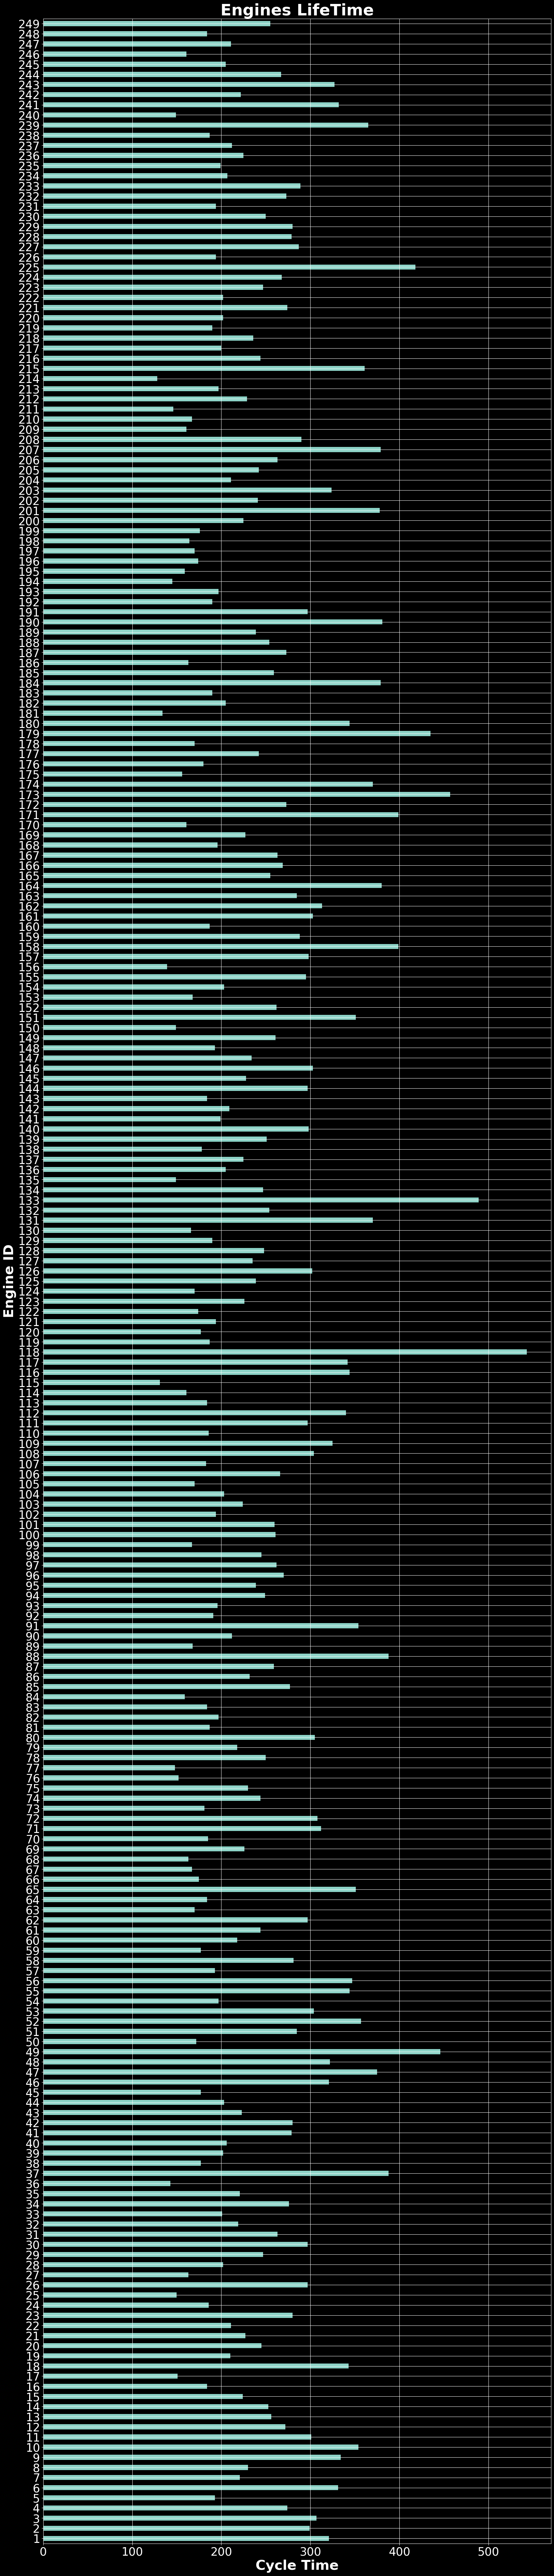

In [22]:
#Use the "dark_background" style for the plots
plt.style.use('dark_background')
# Create a figure with a specific size
plt.figure(figsize=(20,100))
# Create a bar plot of the "cycle" column, grouped by the "id" column
# The plot is horizontal (barh), and the bars are stacked on top of each other
ax=train.groupby('id')['cycle'].max().plot(kind='barh',width=0.5,stacked=True,align='center',rot=0)
# Add a title to the plot with a large font size
plt.title('Engines LifeTime',fontweight='bold',size=35)
# Add a label to the x-axis with a large font size
plt.xlabel('Cycle Time',fontweight='bold',size=30)
# Set the font size of the x-tick labels
plt.xticks(size=25)
# Add a label to the x-axis with a large font size
plt.ylabel('Engine ID',fontweight='bold',size=30)
# Set the font size of the y-tick labels
plt.yticks(size=25)
plt.grid(True)
#show the graph
plt.show()

In [23]:
# Rename the columns of the "test_results" dataframe
test_results.columns=["rul","null"]
# Print the first 5 rows of the "test_results" dataframe
test_results.head()

,rul,null
0,22,NaN
1,39,NaN
2,107,NaN
3,75,NaN
4,149,NaN


In [24]:
test_results.drop(["null"],axis=1,inplace=True)
test_results['id']=test_results.index+1
test_results.head()

,rul,id
0,22,1
1,39,2
2,107,3
3,75,4
4,149,5


In [25]:
# Create a dataframe with the maximum value of the "cycle" column, grouped by the "id" column
rul = pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
# Rename the columns of the "rul" dataframe
rul.columns = ['id', 'max']

In [26]:
# Print the first 5 rows of the "rul" dataframe
rul.head()

,id,max
0,1,230
1,2,153
2,3,141
3,4,208
4,5,51


In [28]:
# Add a new column to the "test_results" dataframe, named "rul_failed"
# The values in the "rul_failed" column are the values in the "rul" column, plus the values in the "max" column of the "rul" dataframe
test_results['rul_failed']=test_results['rul']+rul['max']
# Print the first 5 rows of the "test_results" dataframe
test_results.head()

,rul,id,rul_failed
0,22,1,252
1,39,2,192
2,107,3,248
3,75,4,283
4,149,5,200


In [30]:
# Drop the "rul" column from the "test_results" dataframe
# The "axis=1" argument specifies that we are dropping a column, rather than a row
# The "inplace=True" argument specifies that the changes should be made in-place, rather than creating a copy of the dataframe
test_results.drop(["rul"],axis=1,inplace=True)

In [31]:
# Merge the "test_results" dataframe with the "test" dataframe, based on the "id" column
# The "how='left'" argument specifies that the rows in the "test" dataframe should be kept, and the missing values in the merged dataframe should be filled with NaN
test=test.merge(test_results,on=['id'],how='left')

In [32]:
# Add a new column to the "test" dataframe, named "remaining_cycle"
# The values in the "remaining_cycle" column are calculated by subtracting the values in the "cycle" column from the values in the "rul_failed" column
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
# Print the first 5 rows of the "test" dataframe
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,rul_failed,remaining_cycle
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,0.02,362,2324,100.00,24.31,14.7007,NaN,NaN,252,251
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,0.02,306,1915,84.93,14.36,8.5748,NaN,NaN,252,250
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,0.02,328,2212,100.00,10.39,6.4365,NaN,NaN,252,249
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,0.02,328,2212,100.00,10.56,6.2367,NaN,NaN,252,248
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,0.02,333,2223,100.00,14.85,8.9326,NaN,NaN,252,247


In [33]:
# Print the number of null values in each column of the "test" dataframe
test.isnull().sum()

id                     0
cycle                  0
op1                    0
op2                    0
op3                    0
sensor1                0
sensor2                0
sensor3                0
sensor4                0
sensor5                0
sensor6                0
sensor7                0
sensor8                0
sensor9                0
sensor10               0
sensor11               0
sensor12               0
sensor13               0
sensor14               0
sensor15               0
sensor16               0
sensor17               0
sensor18               0
sensor19               0
sensor20               0
sensor21               0
sensor22           41214
sensor23           41214
rul_failed             0
remaining_cycle        0
dtype: int64

In [35]:
# Drop the "sensor22" and "sensor23" columns from the "train" dataframe
# The "axis=1" argument specifies that we are dropping columns, rather than rows
df_train=train.drop(["sensor22","sensor23"],axis=1)
# Drop the "sensor22" and "sensor23" columns from the "test" dataframe
# The "axis=1" argument specifies that we are dropping columns, rather than rows
df_test=test.drop(["sensor22","sensor23"],axis=1)

In [36]:
# Drop the "rul_failed" column from the "df_test" dataframe
# The "axis=1" argument specifies that we are dropping a column, rather than a row
# The "inplace=True" argument specifies that the changes should be made in-place, rather than creating a copy of the dataframe
df_test.drop(["rul_failed"],axis=1,inplace=True)
# Print the column names of the "df_test" dataframe
df_test.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21',
       'remaining_cycle'],
      dtype='object')

In [37]:

# Add a new column to the "df_train" dataframe, named "remaining_cycle"
# The values in the "remaining_cycle" column are calculated by subtracting the values in the "cycle" column from the maximum value of the "cycle" column, grouped by the "id" column
df_train['remaining_cycle'] = df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']

In [38]:
# Display the first 5 rows of the df_train DataFrame
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316


In [39]:
# Print the last 5 rows of the "df_train" dataframe
df_train.tail()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,4
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,3
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,2
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,1
61248,249,255,42.0030,0.8400,100.0,445.00,549.85,1369.75,1147.45,3.91,...,2388.66,8144.33,9.1207,0.02,333,2212,100.0,10.66,6.4341,0


In [40]:
# Set the value of the "cycle" variable to 30
cycle=30
# Add a new column to the "df_train" dataframe, named "label"
# The values in the "label" column are calculated using a lambda function, which returns 1 if the value of the "remaining_cycle" column is less than or equal to "cycle", and 0 otherwise
df_train['label'] = df_train['remaining_cycle'].apply(lambda x: 1 if x <= cycle else 0)
# Add a new column to the "df_test" dataframe, named "label"
# The values in the "label" column are calculated using a lambda function, which returns 1 if the value of the "remaining_cycle" column is less than or equal to "cycle", and 0 otherwise
df_test['label'] = df_test['remaining_cycle'].apply(lambda x: 1 if x <= cycle else 0)

In [41]:
# Create a list of strings named "op_set", containing the elements "op1", "op2", and "op3"
op_set=["op"+str(i) for i in range(1,4)]
# Create a list of strings named "sensor", containing the elements "sensor1" through "sensor21"
sensor=["sensor"+str(i) for i in range(1,22)]

In [42]:
# Print the unique values in the "id" column of the "test" dataframe
test.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

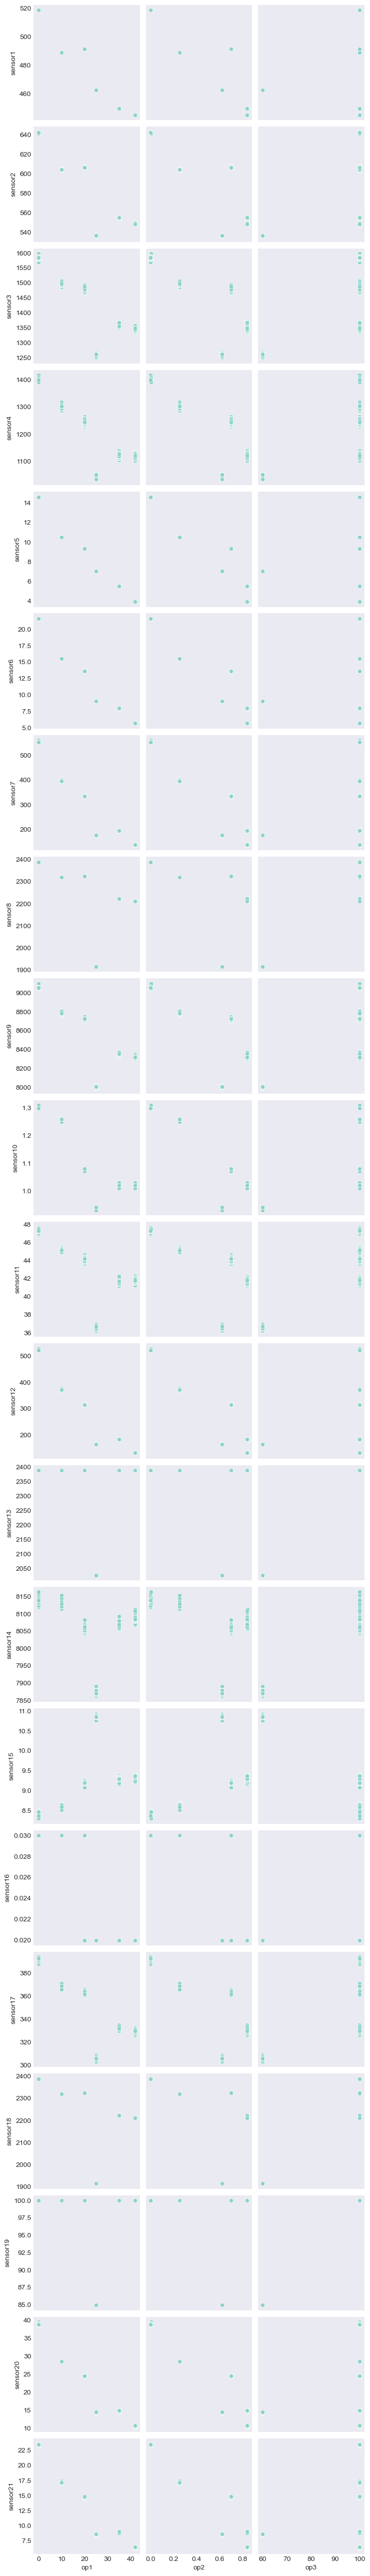

In [43]:
# Set the style of the plot to "seaborn-dark"
plt.style.use('seaborn-dark')
# Create a pairplot using the "sb" library, with the "test" dataframe as the data source
# The "x_vars" argument specifies the variables to use for the x-axis of the plot, and the "y_vars" argument specifies the variables to use for the y-axis
# The "query" function is used to filter the data, so that only rows with "cycle" values are plotted
# The "palette" argument specifies the color palette to use for the plot
ax=sb.pairplot(test.query("cycle"),x_vars=op_set,y_vars=sensor,palette="husl")

In [47]:
# Print the unique values in the "label" column of the "df_train" dataframe
df_train.label.unique()

array([0, 1], dtype=int64)

In [48]:
# Print the first 5 rows of the "df_test" dataframe
df_test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle,label
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,251,0
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,250,0
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,249,0
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,248,0
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,247,0


In [49]:
# Print the column labels of the "df_test" dataframe
df_test.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21',
       'remaining_cycle', 'label'],
      dtype='object')

In [50]:
# Drop the specified columns from the "df_test" dataframe, and modify the dataframe in place
df_test.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19"],axis=1,inplace=False)

,op1,op2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,remaining_cycle,label
0,20.0072,0.7000,606.67,1481.04,1227.81,332.52,2323.67,8704.98,43.83,313.03,2387.78,8048.98,9.2229,362,24.31,14.7007,251,0
1,24.9984,0.6200,536.22,1256.17,1031.48,174.46,1915.21,7999.94,36.11,163.61,2028.09,7863.46,10.8632,306,14.36,8.5748,250,0
2,42.0000,0.8420,549.23,1340.13,1105.88,137.34,2211.93,8305.38,41.52,129.98,2387.95,8071.13,9.3960,328,10.39,6.4365,249,0
3,42.0035,0.8402,549.19,1339.70,1107.26,137.23,2211.89,8301.00,41.73,129.48,2387.90,8078.89,9.3594,328,10.56,6.2367,248,0
4,35.0079,0.8400,555.10,1353.04,1117.80,192.94,2222.71,8331.05,41.32,181.82,2387.87,8057.83,9.3030,333,14.85,8.9326,247,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,41.9991,0.8401,550.30,1364.40,1129.17,138.34,2212.35,8351.73,42.30,130.87,2388.50,8112.61,9.4427,331,10.53,6.2620,30,1
41210,20.0026,0.7005,608.00,1494.75,1260.88,334.75,2324.23,8758.69,44.53,314.51,2388.33,8086.83,9.2772,366,24.33,14.6486,29,1
41211,34.9988,0.8413,555.92,1370.65,1130.97,194.92,2223.57,8370.49,42.33,182.76,2388.64,8100.84,9.3982,336,14.69,8.8389,28,1
41212,20.0027,0.7000,608.19,1489.11,1256.25,333.15,2324.19,8753.04,44.78,314.17,2388.37,8085.24,9.2727,366,24.44,14.6887,27,1


In [51]:
# Print the unique values in the "label" column of
df_test.label.unique()

array([0, 1], dtype=int64)

In [52]:
# Create a new dataframe "x" by dropping the specified columns from the "df_train" dataframe
x=df_train.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","remaining_cycle","label"],axis=1)
# Create a new series "y" by selecting the "label" column from the "df_train" dataframe
y=df_train.label
# Print the shapes of the "x" and "y" dataframes
print('x shape : ',x.shape)
print('y shape : ',y.shape)

x shape :  (61249, 16)
y shape :  (61249,)


In [53]:
# Import the "train_test_split" function from the "sklearn.model_selection" module
from sklearn.model_selection import train_test_split
# Split the "x" and "y" dataframes into training and test sets, with a test size of 0.2 and a random seed of 3
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=3)
# Print the shapes of the resulting training and test sets  
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (48999, 16)
X_test shape :  (12250, 16)
y_train shape :  (48999,)
y_test shape :  (12250,)


In [55]:
# Import the "lightgbm" library as "lgb"
import lightgbm as lgb
# Create a LightGBM classifier object, with specified hyperparameters
lgb_clss = lgb.LGBMClassifier(learning_rate=0.01,n_estimators=5000,num_leaves=100,objective='binary', metrics='auc',random_state=50,n_jobs=-1)
# Fit the classifier to the training data
lgb_clss.fit(X_train, y_train)
# Calculate the accuracy of the classifier on the test data
lgb_clss.score(X_test, y_test)
# Make predictions on the test data
preds2 = lgb_clss.predict(X_test)
# Print the accuracy, ROC AUC, precision, recall, and f1 scores of the classifier on the test data
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))

Acc Score:  0.9605714285714285
Roc Auc Score:  0.8976111036301047
Precision Score:  0.867445054945055
Recall Score:  0.8132646490663232
f1 score:  0.839481555333998


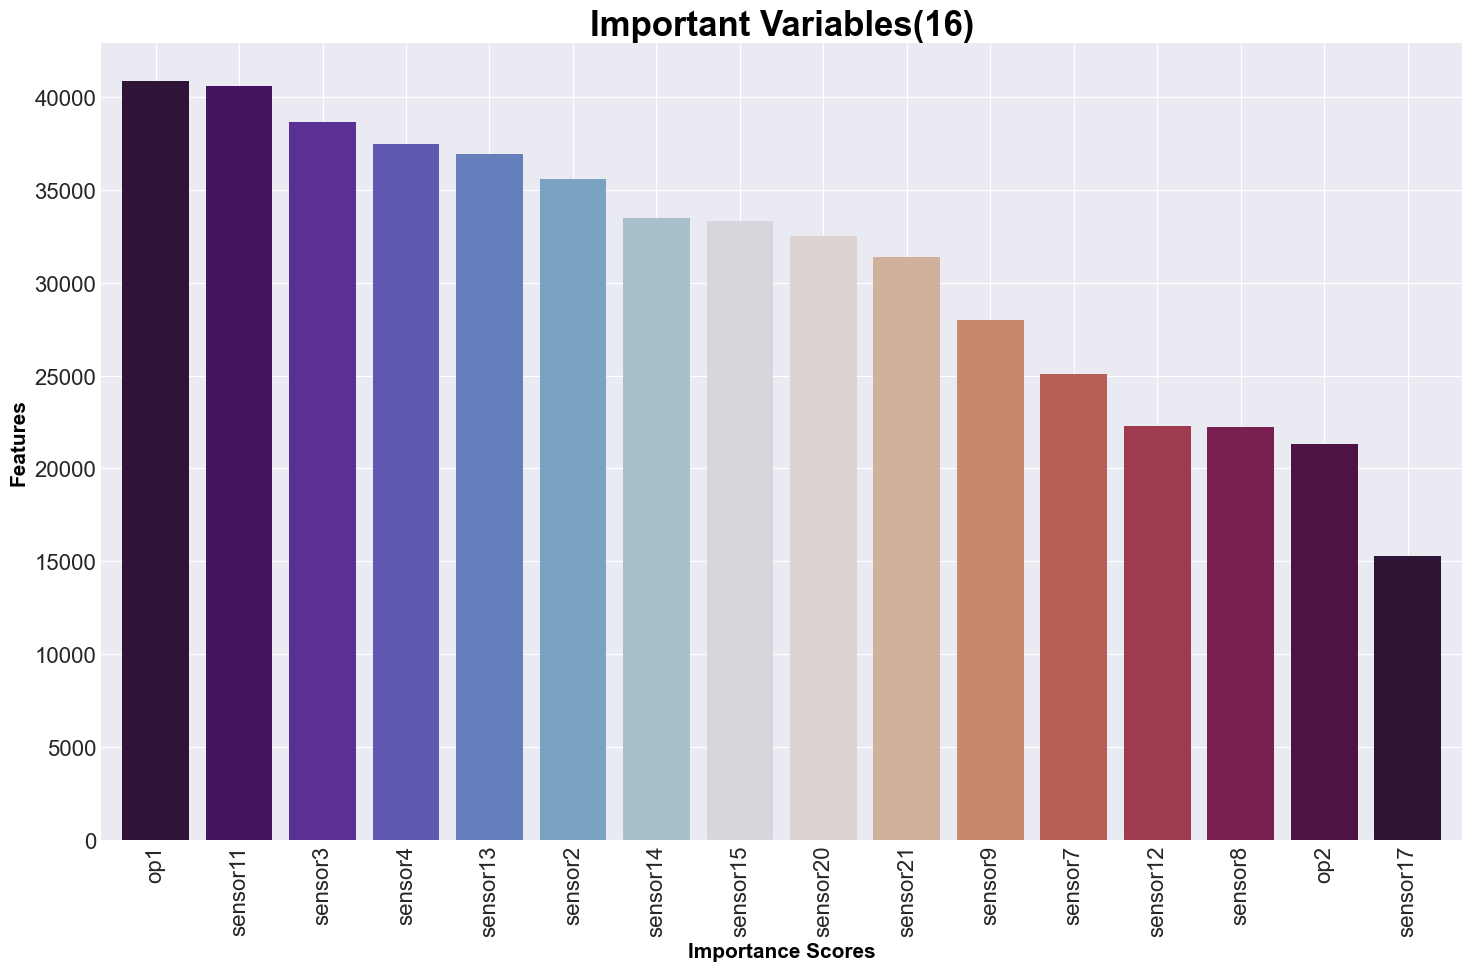

In [56]:
# Create a list of colors for the bar plot, based on the number of columns in the "x" dataframe
colors = [plt.cm.twilight_shifted(i/float(len(x.columns)-1)) for i in range(len(x.columns))]
# Get the list of column labels for the "X_train" dataframe
columns_X_train=x.columns.tolist()
# Convert the "X_train" dataframe to a Pandas DataFrame and set the column labels
X_train=pd.DataFrame(X_train)
# Create a Pandas Series containing the feature importances for the "X_train" dataframe
X_train.set_axis(columns_X_train, axis=1, inplace=True)
feat_importances = pd.Series(lgb_clss.feature_importances_, index=X_train.columns)
# Create a bar plot of the top 16 most important features, using the specified colors and labels
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 16})
plt.title('Important Variables(16)',color='black',fontweight='bold',size=25)
feat_importances.nlargest(16).plot(kind='bar', color=colors, width=0.8, align='center')
plt.ylabel('Features',color='black',fontweight='bold',size=15)
plt.xlabel('Importance Scores',color='black',fontweight='bold',size=15)
plt.tight_layout()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Variables')

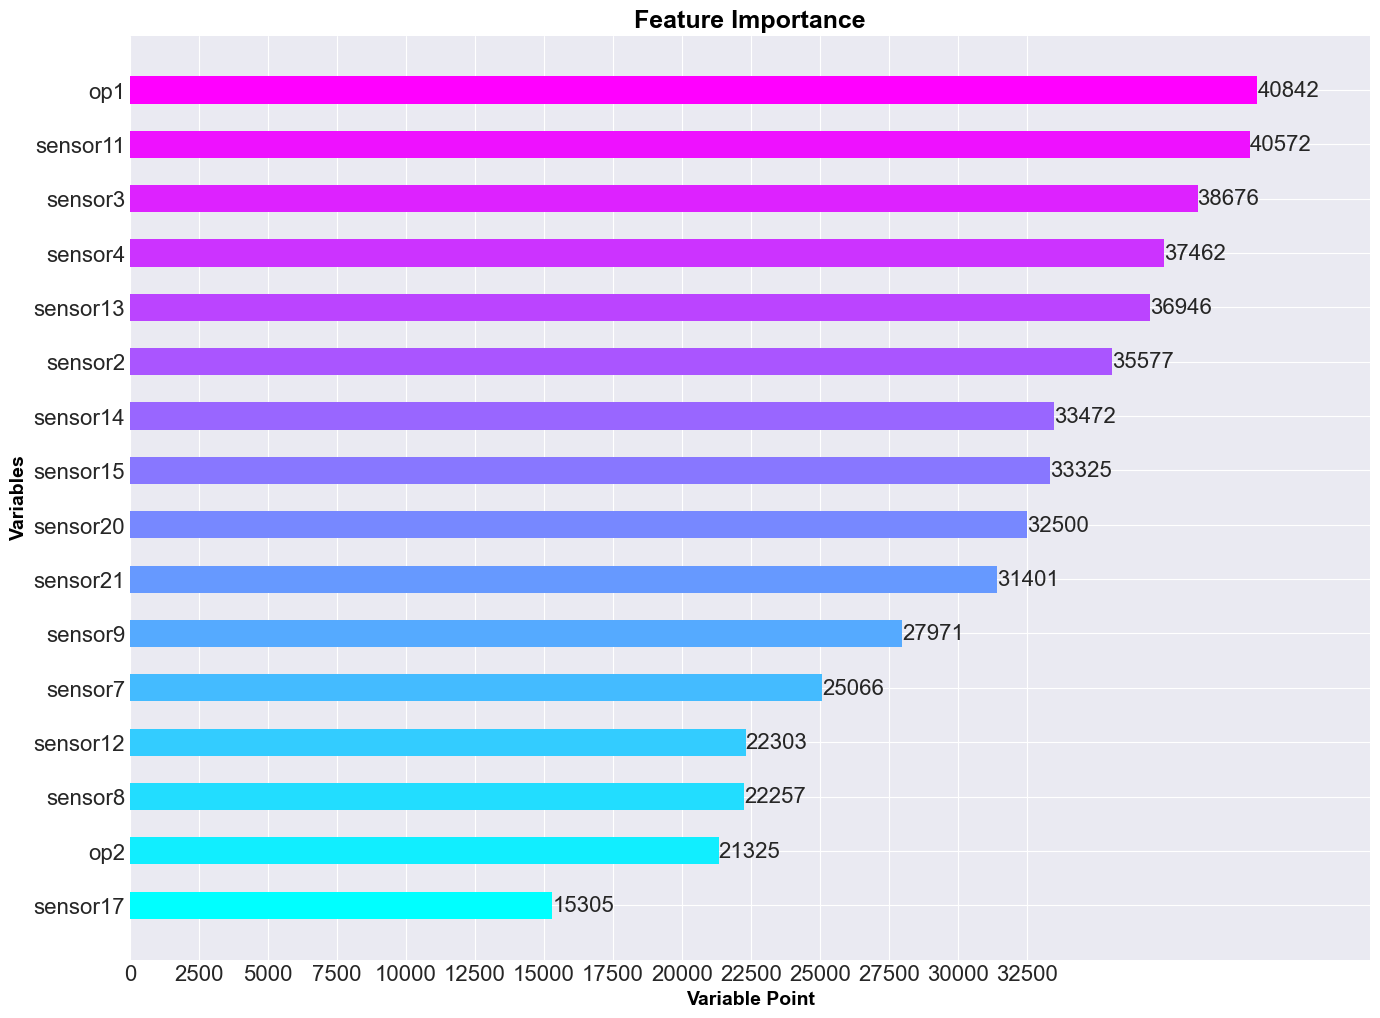

In [55]:
# Set colors for plot
colors = [plt.cm.cool(i/float(len(x.columns)-1)) for i in range(len(x.columns))]
# Plot feature importance using the trained model
ax = lgb.plot_importance(lgb_clss, max_num_features=16,figsize=(16,12),height=0.5,color=colors)
# Set plot title and axis labels
ax.set_title('Feature Importance',color='black',fontweight='bold',size=18)
ax.set_xlabel('Variable Point',color='black',fontweight='bold',size=14)
ax.set_xticks(np.arange(0,32501,2500))
ax.set_ylabel('Variables',color='black',fontweight='bold',size=14)

In [56]:
# Import the StratifiedKFold and RandomizedSearchCV functions from scikit-learn
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
# Import the StratifiedKFold and RandomizedSearchCV functions from scikit-learn
stf_kf=StratifiedKFold(n_splits=5)
# Import the XGBoost library
import xgboost as xgb
# Create an XGBoost classifier object
xgb_classifier=xgb.XGBClassifier(n_estimators=725,n_jobs=-1)
# Define the hyperparameter search space
params={
         'learning_rate': np.arange(0.01, 0.11, 0.025),
         'max_depth': np.arange(1, 10, 1),
         'min_child_weight': np.arange(1, 10, 1), 
         'subsample': np.arange( 0.7, 1, 0.05), 
         'gamma': np.arange(0.5, 1, 0.1), 
         'colsample_bytree': np.arange( 0.1, 1, 0.05), 
         'scale_pos_weight': np.arange( 20, 200, 10)}
# Create a randomized search cross-validation object using the XGBoost classifier and the defined search space
rs_cv_classifier=RandomizedSearchCV(xgb_classifier,param_distributions=params,cv=stf_kf,n_jobs=-1)
# Fit the randomized search object to the training data
rs_cv_classifier.fit(X_train,y_train)
# Make predictions on the test set
y_pred=rs_cv_classifier.predict(X_test)
# Print the best hyperparameters and the accuracy score of the model on the test set
print("Best Parameter: \n",rs_cv_classifier.best_params_)
print("XGBClassifier Acc Score: ",accuracy_score(y_pred,y_test))

Best Parameter: 
 {'subsample': 0.8, 'scale_pos_weight': 90, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.060000000000000005, 'gamma': 0.8999999999999999, 'colsample_bytree': 0.9000000000000002}
XGBClassifier Acc Score:  0.9213061224489796


In [ ]:
# Make predictions on the test set using the trained model
df_test_pred = rs_cv_classifier.predict(df_test.drop(['remaining_cycle','label'],axis=1))
#Calculate the confusion matrix
cm=confusion_matrix(df_test.iloc[:,-1], df_test_pred, labels=None, sample_weight=None)

In [ ]:
# Print the accuracy score of the model on the test set
print("Test Accuracy Score: ", accuracy_score(df_test.iloc[:,-1],df_test_pred))

In [58]:
# Create a figure with a specified size
plt.figure(figsize=(16,12))
# Plot a heatmap of the confusion matrix
sb.heatmap(cm,annot=True,annot_kws={"size": 25},linewidths=0.7,linecolor="black",cmap="winter_r",fmt="d")

NameError: name 'cm' is not defined

<Figure size 1600x1200 with 0 Axes>

KeyError: "['RUL'] not found in axis"